In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("star_classification.csv")

In [3]:
data1 = data.drop(columns=["obj_ID","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","plate","MJD","fiber_ID"])
data1

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


In [4]:
X = data1.drop(['class'],axis=1)
X

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


In [5]:
Y = data1["class"]
Y

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 100000, dtype: object

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [7]:
#encoding:-
#le=LabelEncoder()
#Y = le.fit_transform(Y)
#unique, counts = np.unique(Y, return_counts=True)
#print(unique, counts)
#Y_df = pd.DataFrame({'class':Y})
#Y_df.value_counts()

In [8]:
#scaling:-
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train: ", (X_train.shape))
print("X_test: ", (X_test.shape))
print("Y_train: ", (Y_train.shape))
print("Y_test: ", (Y_test.shape))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train:  (80000, 8)
X_test:  (20000, 8)
Y_train:  (80000,)
Y_test:  (20000,)


In [9]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print("shape of original dataset: ",Counter(Y))
print("shape of original Y_train dataset: ",Counter(Y_train))
print("shape of resampled Y_train dataset: ",Counter(Y_train_smote))

shape of original dataset:  Counter({'GALAXY': 59445, 'STAR': 21594, 'QSO': 18961})
shape of original Y_train dataset:  Counter({'GALAXY': 47585, 'STAR': 17251, 'QSO': 15164})
shape of resampled Y_train dataset:  Counter({'GALAXY': 47585, 'STAR': 47585, 'QSO': 47585})


In [22]:
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
rfc_clf = RandomForestClassifier(random_state = 42)

In [12]:
rfc = rfc_clf.fit(X_train_smote, Y_train_smote)
print(rfc)

RandomForestClassifier(random_state=42)


In [13]:
Y_predicted = rfc.predict(X_test)
score = rfc.score(X_test, Y_test)
rfc_score = np.mean(score)
print('Accuracy : %.3f' % (rfc_score))
print('Accuracy percentage : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.974
Accuracy percentage :  97.42%


In [14]:
new_data = np.array([[135.689107, 32.494632, 23.87882, 22.27530, 20.39501, 19.16573, 18.79371, 0.634794]])
Y_predicted = rfc.predict(new_data)
print(Y_predicted)

['GALAXY']


In [15]:
logreg = LogisticRegression()
LR_model = logreg.fit(X_train_smote, Y_train_smote)
print(LR_model)

LogisticRegression()


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
Y_predicted1 = LR_model.predict(X_test)
score = LR_model.score(X_test, Y_test)
LR_score = np.mean(score)
print('Accuracy : %.3f' % (LR_score))
print('Accuracy percentage : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.943
Accuracy percentage :  94.34%


In [19]:
new_data1 = np.array([[135.689107, 32.494632, 23.87882, 22.27530, 20.39501, 19.16573, 18.79371, 0.634794]])
Y_predicted2 = LR_model.predict(new_data1)
print(Y_predicted2)

['GALAXY']


Confusion Matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


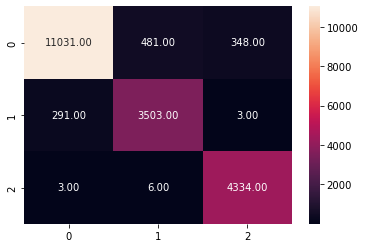

In [28]:
print("Confusion Matrix:")
cm = (confusion_matrix(Y_test, Y_predicted1))
print(sns.heatmap(cm,annot=True,fmt=".2f"))

In [25]:
# classification report
print("Classification Report:")
print(classification_report(Y_test, Y_predicted1))

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.97      0.93      0.95     11860
         QSO       0.88      0.92      0.90      3797
        STAR       0.93      1.00      0.96      4343

    accuracy                           0.94     20000
   macro avg       0.93      0.95      0.94     20000
weighted avg       0.95      0.94      0.94     20000

